# Informe del Uso de La herramienta Keras para clasificación de Imágenes
## Hernán Alveiro Erazo Guerrero
## Maestría en Ciencias de la Información y las Comunicaciones
## Universidad Distrital Francisco José de Caldas

### 1. Introducción

En este Notebook se presenta ejemplos del uso de Keras, como herramienta de Inteligencia Artificial (IA) para la clasificación de imágenes. Con esta herramienta se puede implementar muchos algoritmos de IA de forma rápida y fácil, sin embargo, en estos ejemplos se busca enfocarse en las redes neuronales convolucionales, apropiadas para el manejo de imágenes y video. Las pruebas se realizaron en Jupyter, programa disponible de forma gratuita en Azure, con una cuenta de Microsoft se puede realizar estas pruebas de forma rápida sin necesidad de instalar estas herramientas en un computador personal.


### 2. Clasificación de Números Escritos

En este primer ejemplo se quiere hacer una prueba con un dataset incluido en la librería Keras, este es un dataset que incluye las imágenes de los números del 1 al 9, escritos por diferentes personas o de diferentes formas, este ejemplo es desarrollado por el profesor Miguel Soraquira [1], y el objetivo es, mediante un algoritmo, el sistema va a determinar qué número es el que se le presenta en la imágen, a continuación se presenta el código y siguiente a esto la explicación de cada parte.

Antes de empezar la implementación, cabe aclarar la forma en cómo se hizo este ejercicio. Como se vio en clase, las redes neuronales convolucionales se caracterizan por su implementación en etapas, tal como se muestra en la Figura:

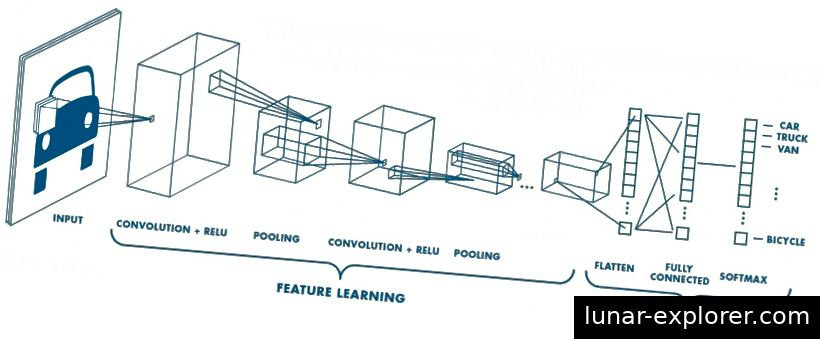

En esta imagen [2] se puede ver cómo la identificación de la forma de la imagen de entrada va cambiando, primero se realiza el proceso de convolución, que consiste en pasar un kernel, por la imagen de tal forma que se vaya operando, devolviendo un resultado de una sumatoria de la multiplicación pixel por pixel; se agrega una función relu con el fin de quitar los números negativos de este resultado. Es necesario decir que por cada kernel se va a producir una imagen, es decir, el resultado final va a ser una imagen más pequeña a lo ancho y alto, pero va a tener una profundidad, esta profundidad van a ser las capas que se apilan de acuerdo al número de kernel que se crean. El pooling o max poling, es un proceso de selección que se hace con el fin de identificar el mayor de un número de pixeles dados por la selección del kernel a usar. Finalmente se ejecuta el proceso de flaten, que es poner todos los pixeles de todas las imagenes de forma que sean las entradas para una red neuronal convencional completamente conectada, el último paso es aplicar el proceso de Función de activación SoftMax para obtener las salidas, que serán cada una de las clases del dataset, para este caso específico, los números del cero al nueve.

#### 2.1 Implementación del Código

A continuación se presenta los pasos de la implementación del primer código.

In [1]:
import numpy as np
np.random.seed(2)

import matplotlib.pyplot as plt
%matplotlib notebook

Primero se inicia la librería numpy de python, esta librería permite obtener gran cantidad de funciones matemáticas y estadísticas para la operación, en la linea 2, se tiene que se mantiene la raíz, es decir, se mantiene los números que vayan a ser generados aleatoriamente, proceso tras proceso para que se obtengan los mismos resultados. La siguiente librería es matplotlib, usada para visulalizar datos, esto nos permitirá tener las gráficas tanto de los datos de entrenamiento como de los resultados.

In [2]:
#from keras.datasets import mnist
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


Paso siguiente, se procede a importar las librerías más importantes de keras que se van a usar para realizar este proyecto, la primera herramienta es mnist, este es el dataset que incluye los números. La siguiente es Sequential, que sirve para crear modelos secuenciales, es decir, que el resultado de un método implementado, pueda entrar en un método siguiente, por ejemplo, la salida de la convolución pueda ser usada por el método pooling. En la siguiente parte se importan las librerías Conv2D y MaxPooling2D, usadas para los procesos de convolución y pooling. Paso siguiente se importa las librerías Flatten y Dense para operar los datos en la red neuronal convencional y finalmente SGD para usar el método del descenso del gradiente para entrenar el modelo.

In [6]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 4s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


En esta fase se carga el conjunto de datos disponible en los repositorios de Keras y se muestra la cantidad de datos, y el tamaño de las imágenes, en total son 70000 imágenes, 10000 para validación y 60000 para entrenamiento; el tamaño de las imágenes es 28x28 pixeles.

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

En estas dos líeas de código se normalizan los valores de entrada de tal manera que los valores de los pixeles estén entre 0 y 1.


In [8]:
nclases = 10
y_train = np_utils.to_categorical(y_train,nclases)
y_test = np_utils.to_categorical(y_test,nclases)

En las tres lineas anteriores, se hace un preprocesamiento de datos con numpy para pasar a dato categóricos, además se define el número de las clases.

(-0.5, 27.5, 27.5, -0.5)

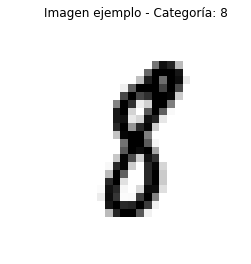

In [11]:
nimagen = 300
plt.imshow(x_train[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(y_train[nimagen])))
plt.axis('off')

En esta parte se trata de visualizar una imagen dada por categoría, por ejemplo el número 8, de esta manera se puede tener una idea de cómo se ven las imágenes del dataset.

In [12]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


En la anterior parte se desarrolla un reshape para indicar que los valores de los pixeles tendrán un solo canal de información, debido a que estos están en escala de grises.

In [13]:
modelo = Sequential()

Se crea un modelo tipo sequential, de tal manera que se después se vayan adicionando las capas de procesos que el modelo irá ejecutando.

In [14]:
# CONV1 Y MAX-POOLING1
modelo.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
modelo.add(MaxPooling2D(pool_size=(2,2)))

# CONV2 Y MAX-POOLING2
modelo.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

# Aplanar, FC1, FC2 y salida
modelo.add(Flatten())
modelo.add(Dense(120,activation='relu'))
modelo.add(Dense(84,activation='relu'))
modelo.add(Dense(nclases,activation='softmax'))

Las lineas anteriores son, quizás, la parte más importante del modleo de redes convolucionales, es en donde se detalla todas las características que van a tener el modelo deseado. En las líneas 2 y 3, la primera convolución que se realiza a las imágenes, se le dice que van a ser 6 filtros, es decir la profundidad de las nuevas imágenes será de 6, el tamaño del kernel, la función de activación que va a ser relu y la forma de las entradas, que va a ser una imagen de 28x28 en escala de grises. Paso siguiente se detalla el proceso de MaxPooling en dónde el tamaño del kernel será de 2x2. En las líneas 6 y 7 se presenta otra etapa de convolución y maxpooling, esta vez son 16 filtros, el tamaño del kernel se conserva, la función de activación se deja como relu, y gracias a que tenemos un modelo secuencial, no es necesario determinar el tamaño de las nuevas imágenes. El tamaño del filtro de Maxpooling tendrá el mismo tamaño del primero. 

Finalmente, se aplana el modelo, y con la función Dense, se crea dos capas ocultas, la primera con 120 neuronas con función de activación relu y la siguiente con 84 neuronas. La capa de salida va a tener las 10 clases antes definidas y la función de activación será la softmax.

In [15]:
sgd = SGD(lr=0.1)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

En la anterior entrada se define las características de evaluación del modelo, en la línea 1 se define una radio de apredizaje de 0.1; en la línea 2, se define los datos de la evalución usando el método compile. Los datos son, para el error se va a usar la entropía curzada, el optimizador será el método de descenso del gradiente y las métricas de evaluación será la precisión o accuracy.

In [16]:
nepochs = 10
tam_lote = 128
modelo.fit(x_train,y_train,epochs=nepochs,batch_size=tam_lote, verbose=1, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.3724 - accuracy: 0.8845 - val_loss: 0.1025 - val_accuracy: 0.9679
Epoch 2/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0898 - accuracy: 0.9723 - val_loss: 0.0641 - val_accuracy: 0.9788
Epoch 3/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0636 - accuracy: 0.9805 - val_loss: 0.0530 - val_accuracy: 0.9834
Epoch 4/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.0437 - val_accuracy: 0.9863
Epoch 5/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0417 - accuracy: 0.9871 - val_loss: 0.0454 - val_accuracy: 0.9857
Epoch 6/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.0411 - val_accuracy: 0.9868
Epoch 7/10
60000/60000 [==============================] - 77s 1ms/st

Finalmente, se define los datos del entrenamiento, en este se especifican las iteraciones, que serán 10, el tamaño del lote es necesario para partir los datos de entrenamiento y que no se sature la memoria al almacenar cada iteración. Finalmente, con la función fit, se entrena el  modelo, nótese que en esta etapa también es útil poner los datos de validación para obtener un dato del desempeño del modelo, sin necesidad de volver a realizar este proceso más tarde, lo cual también es una opción. La palabra verbose, permite ver el progreso del entrenamiento, además de entregar resultados parciales a cada iteración. Como se puede ver en las 10 iteraciones se llega a una precisión del 99.3% en el entrenamiento y de 98.65% en la validación, lo cual es un porcentaje bastante aceptable para este modelo de red convolucional, y la compilación de este programa dura 11.3 minutos.

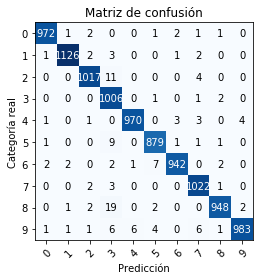

In [28]:
#%run matriz_confusion.ipynb

y_pred = modelo.predict_classes(x_test)
y_ref = np.argmax(y_test,axis=1)
etiquetas = ['0','1','2','3','4','5','6','7','8','9']
graficar_matriz_de_confusion(y_ref, y_pred, etiquetas)


Finalmente, usando un módulo incluido en la carpeta que hace uso de la librería sklearn, podemos graficar la matriz de confusión con los resultados de validación obtenidos, en este se puede observar más a detalle cuáles son los datos que mejor se clasifican, para este caso, el mejor clasificado es el 3, con solo 4 observaciones erroneas, y el peor clasficado es el número 8 con 24 clasificaciones erroneas, curiosamente, la mayoría de estas, clasficiado como el número 3.

### 3. Clasificación de Imágenes reales a Color

En esta parte se quiere realizar otro tipo de clasificación más compleja, la cual incluye clasificar imágenes reales tomadas de fotografías que incluyen 10 tipos distintos de imágenes las cuales están incluidas en el dataset, también disponible en la librería Keras, nombrada como CIFAR-10. Como en el anterior caso también se presenta el código seguido de la descripción, esta vez se hará más corto y solo se mencionará los cambios necesarios para adaptar al tipo de dataset, además de añadir algunas otras herramientas aprendidas en clase como dropout y algunas métricas adicionales para tener mejor idea del desempeño del modelo

In [3]:
from keras.datasets import cifar10
from keras.layers.core import Dropout
import os

En las anteriores líneas se importa el dataset a usar, se importa una nueva librería nombrada Dropout, que más adelante se explicará más de su uso, y os, para hacer uso del sistema operativo cuando guardemos el modelo si llega a ser necesario.

In [4]:
(w_train, z_train), (w_test,z_test) = cifar10.load_data()
print(w_train.shape)
print(z_train.shape)
print(w_test.shape)
print(z_test.shape)

170500096/170498071 [==============================] - 39s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Importamos el modelo y como se puede ver el tamaño es similar la usado anteriormente, sin embargo, las imágenes son a color, y el tamaño es de 32x32, al igual que el anterior se cuenta con un dataset de 60000 imágenes, distribuidas como 50000 imágenes para entrenamiento y 10000 para validación.

In [5]:
w_train = w_train/255.0
w_test = w_test/255.0
nclases = 10
z_train = np_utils.to_categorical(z_train,nclases)
z_test = np_utils.to_categorical(z_test,nclases)

Nuevamente, se normaliza el tamaño de los pixeles a valores entre 0 y 1, y se normaliza las imágenes para las 10 clases que contiene este dataset, las cuales son: aviones, automóviles (incluidos todos los autos pequeños), aves (desde pájaros hasta avestruces), gatos, venados, perros, ranas, caballos, barcos y camiones (que incluyen todos los autos grandes).

(-0.5, 31.5, 31.5, -0.5)

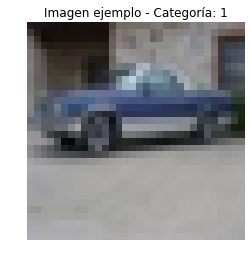

In [9]:
nimagen =10000
plt.imshow(w_train[nimagen,:].reshape(32,32,3))
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(z_train[nimagen])))
plt.axis('off')

Nuevamente se imprime una imagen de ejemplo, esta vez un carro con su número de categoría.

In [7]:
modelo_rgb = Sequential()

modelo_rgb.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
modelo_rgb.add(MaxPooling2D(pool_size=(2,2)))
modelo_rgb.add(Dropout(0.25))


modelo_rgb.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
modelo_rgb.add(MaxPooling2D(pool_size=(2,2)))
modelo_rgb.add(Dropout(0.25))

modelo_rgb.add(Flatten())
modelo_rgb.add(Dense(512,activation='relu'))
modelo_rgb.add(Dense(256,activation='relu'))
modelo_rgb.add(Dense(nclases,activation='softmax'))

En las anteriores líneas se ajusta el modelo entrenado anteriormente para la clasificación de imágenes a blanco y negro. Algunos de los cambios son:

- Primero se debe tener en cuenta que la imagen es a color, por lo tanto el input_shape cambiará, pues los atributos que ingresan al mismo el número de pixeles y el número 3, indicando que se deberá tener 3 capas correspondientes al modelo RGB.

- La siguiente característica en donde difiere es el padding, la cual se usa para asegurar que la imagen resultante después de la convolución, tenga el mismo tamaño de la imagen original.

- Finalmente la función Dropout, consiste en reducir el número de neuronas en las capas para hacer el entrenamiento de diferentes manera, esto con el fin de reducir el overfitting o sobre entrenamiento.

Como se puede ver el modelo es similar, se tiene dos filtros de convolución y Maxpooling, seguidos del proceso de Dropout, eliminando el 25% de las neuronas. Finalmente se crea la red Neuronal convencional para entrenar la salida de las convoluciones, esta vez con dos capas con un mayor número de neuronas, que se pueden requerir para las entrada y una capa oculta adicional, finalmente las clases salen con una función de activación softmax.

In [29]:
sgd = SGD(lr=0.1)
modelo_rgb.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
nepochs = 10
tam_lote = 128
modelo_rgb.fit(w_train,z_train,epochs=nepochs,batch_size=tam_lote, verbose=1, validation_data=(w_test,z_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 247s 5ms/step - loss: 1.9932 - accuracy: 0.2798 - val_loss: 1.6560 - val_accuracy: 0.4240
Epoch 2/10
50000/50000 [==============================] - 250s 5ms/step - loss: 1.5756 - accuracy: 0.4367 - val_loss: 1.4099 - val_accuracy: 0.4918
Epoch 3/10
50000/50000 [==============================] - 248s 5ms/step - loss: 1.3716 - accuracy: 0.5091 - val_loss: 1.2748 - val_accuracy: 0.5456
Epoch 4/10
50000/50000 [==============================] - 254s 5ms/step - loss: 1.2437 - accuracy: 0.5574 - val_loss: 1.1332 - val_accuracy: 0.6036
Epoch 5/10
50000/50000 [==============================] - 250s 5ms/step - loss: 1.1448 - accuracy: 0.5937 - val_loss: 1.0502 - val_accuracy: 0.6364
Epoch 6/10
50000/50000 [==============================] - 237s 5ms/step - loss: 1.0536 - accuracy: 0.6264 - val_loss: 1.0255 - val_accuracy: 0.6387
Epoch 7/10
50000/50000 [==============================] - 228s

Para realizar la etapa de entrenamiento y validación, se hace un proceso similar a la imagen y se evalúa el modelo, con el número de iteraciones del anterior. Se puede ver que para este modelo se alcanza una precisión del 71,88 en la fase de entrenamiento y 67% en la fase de validación. A pesar de que es un número bajo, aún se puede ver un desempeño aceptable en el modelo.

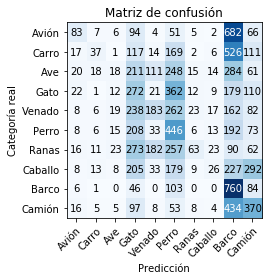

In [39]:
%run matriz_confusion.ipynb

z_pred = modelo_rgb.predict_classes(w_test)
z_ref = np.argmax(z_test,axis=1)
etiquetas = ['Avión','Carro','Ave','Gato','Venado','Perro','Ranas','Caballo','Barco','Camión']
graficar_matriz_de_confusion(z_ref, z_pred, etiquetas)

Para determinar de manera visual si se tiene una buena clasificación, se crea la matriz de confusión, basta con ver esta  gráfica para determinar que la clasificación para ver que no se satisface los requerimiento, pues en la validación hay muchos errores, por lo tanto se procede a realizar un nuevo entrenamiento con más iteraciones.

In [8]:
sgd = SGD(lr=0.1)
modelo_rgb.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
nepochs = 15
tam_lote = 128
history = modelo_rgb.fit(w_train,z_train,epochs=nepochs,batch_size=tam_lote, verbose=1, validation_data=(w_test,z_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 177s 4ms/step - loss: 2.0006 - accuracy: 0.2785 - val_loss: 1.7777 - val_accuracy: 0.3612
Epoch 2/15
50000/50000 [==============================] - 168s 3ms/step - loss: 1.5517 - accuracy: 0.4442 - val_loss: 1.5341 - val_accuracy: 0.4671
Epoch 3/15
50000/50000 [==============================] - 167s 3ms/step - loss: 1.3602 - accuracy: 0.5116 - val_loss: 1.2963 - val_accuracy: 0.5330
Epoch 4/15
50000/50000 [==============================] - 167s 3ms/step - loss: 1.2386 - accuracy: 0.5598 - val_loss: 1.1654 - val_accuracy: 0.5917
Epoch 5/15
50000/50000 [==============================] - 168s 3ms/step - loss: 1.1348 - accuracy: 0.5965 - val_loss: 1.1037 - val_accuracy: 0.6128
Epoch 6/15
50000/50000 [==============================] - 184s 4ms/step - loss: 1.0456 - accuracy: 0.6299 - val_loss: 1.0914 - val_accuracy: 0.6171
Epoch 7/15
50000/50000 [==============================] - 171s

Para la segunda prueba se trabaja con un número de iteraciones mayor, en pruebas previas a la del informe final, se observó que después de la iteración número 12 los valores de validación ya convergen, a un valor de 70%, por lo tanto no se ha hecho más iteraciones. Como se puede ver el valor mayor es de aproximadamente 71% en la validación y 82% en la etapa de entrenamiento, con estos datos se puede decir que, a pesar de que el modelo es muy sencillo pues solo cuenta con dos capas de convolución y con dos capas en las redes neuronales convencionales, si se puede hacer un diseño más sofisticado se puede obtener mejores resultados, como se verá en las conclusiones. Para determinar cuáles de las clases están mejor clasificadas se procede a graficar la matriz de confusión, esto nos permite ver si el entrenamiento es efectivo en realidad.

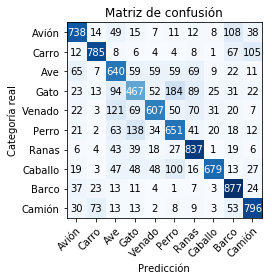

In [10]:
%run matriz_confusion.ipynb

z_pred = modelo_rgb.predict_classes(w_test)
z_ref = np.argmax(z_test,axis=1)
etiquetas = ['Avión','Carro','Ave','Gato','Venado','Perro','Ranas','Caballo','Barco','Camión']
graficar_matriz_de_confusion(z_ref, z_pred, etiquetas)

De acuerdo a la Matriz de confusión se puede ver que con solo 15 iteraciones ya se tiene resultados bastante satisfactorios. pues en estos se muestra que algunas clases ya alcanzan una buena clasificiación, tales como las imágenes de barcos y de ranas. Por el contrario las imágenes de animales mamíferos como el gato, el venado, y el perro, aún no se alcanza una clasficación satisfactoria.

Finalmente es importante graficar cuál es el desempeño del modelo a medida que se entrena, esto se lo consigue con las gráficas de accuracy y error que se muestran a continuación.

10000/10000 [==============================] - 11s 1ms/step
Test loss: 0.8698895945549011
Test accuracy: 0.7077000141143799


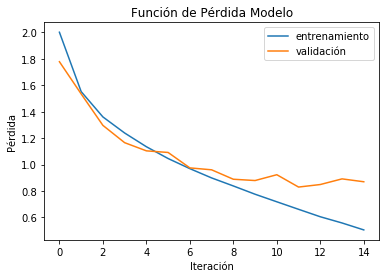

In [21]:
scores = modelo_rgb.evaluate(w_test, z_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
from keras.utils import plot_model
plot_model(modelo_rgb, to_file='model.png')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Función de Pérdida Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')
plt.legend(['entrenamiento', 'validación'], loc='upper right')
plt.show()

En esta etapa se muestran los resultados , una pérdida de 0.87 aproximadamente, y una precisión de 70.7%, nótese en la gráfica que la línea en naranja comienza a estabilizarse, este modelo también fue evaluado para mayor cantidad de iteraciones sin tener un resultado superior al 73%, se decidió escoger 15 iteraciones para presentarlas en este informe, porque en este punto se alcanza su mejor resultado en promedio y además no se ve un sobre entrenamiento en el conjunto de datos.

### 4. Conclusiones

- En este proyecto se desarrolló dos ejemplos de cómo, mediante el uso de la librería Keras, se pueden implementar modelos de Redes Neuronales Convolucionales de forma rápida y con pocas líneas de código. Los resultados logrados en los dos ejemplos son satisfactorios, esto contando con que los modelos diseñados fueron sencillos para que el procesamiento sea más rápido y obtener los resultados para realizar correcciones o mejoras al modelo.

- Se estudió dos ejemplos, las imágenes a blanco y negro, y las imágenes a color, la codificación puede diferir en algunas partes, lo cual se aclaró pertinentemente, sin embargo, en el caso de las imágenes a color el modelo tuvo unos ajustes breves, pero conservó la estructura de la red convolucional que se definió al principio de este documento. El procesamiento de las imágenes a color es mucho más complejo, pues cada imagen tendrá tres capas y los kernel de convolución también son más grandes, lo que da como resultados que el riempo de procesamiento también sea mayor.

- Para realizar este informe se usó Azure Notebooks, una herramienta de Microsoft que se puede recomendar, pues es bastante eficiente y realiza un proceso de cloud computing bastante eficiente, considerando que su uso es gratis si se cuenta con una cuenta de correo Microsoft.

### REFERENCIAS

[1] Miguel Sotaquira - Codificando Bits: Clasificar Imágenes usando redes convolucionales. Disponible en: https://www.youtube.com/watch?v=SGoxsBgp3WM

[2] Lunar-Explores.com: TensorFlow- Detección de cáncer de mama mediante redes convolucionales. Disponible en: https://es.lunar-explorer.com/post/tensorflow-breast-cancer-detection-using-convolutional-neural-networks/

[3]Keras.io: Keras: The Python Deep Learning Library. Disponible en: https://keras.io/